### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    DEVELOPING="True"
    TAVILY_API_KEY="???"
    OLLAMA_ENDPOINT="http://localhost:11434"
    ```

---

In [1]:
%%capture

import json
import os

os.chdir("..")

from dotenv import load_dotenv

load_dotenv()

from IPython.display import Markdown, display

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# graph rendering
import nest_asyncio
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
# agent = experiment_utils.create_ollama_agent(
#    agent_type="react_rag",
#    llm_tag="phi4-mini:latest",
#    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
# )

agent = experiment_utils.create_xai_agent(
    agent_type="adaptive_rag", llm_tag="grok-2-vision", api_key=os.getenv("XAI_API_KEY")
)

In [3]:
# create attachment
# attachment_id = experiment_utils.create_attachment(
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip",
#     content_type="application/zip",
# )
#
# processed_attachment = experiment_utils.create_embeddings(
#     attachment_id,
#     language_model_id=agent["language_model_id"],
#     collection_name="static_document_data"
# )

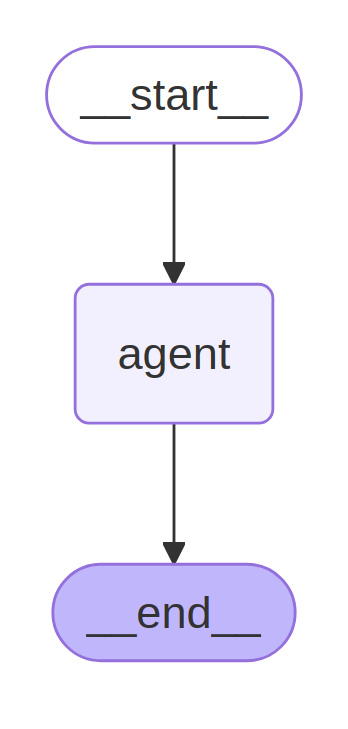

In [4]:
# get agent instance
react_rag_agent = container.react_rag_agent()

# Create Graph
workflow = react_rag_agent.get_workflow(agent["id"])
experiment_utils.print_graph(workflow)

In [5]:
agent_config = {
    "configurable": {
        "thread_id": agent["id"],
    },
    "recursion_limit": 30,
}

In [6]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=agent["id"],
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)
ai_message_content, workflow_state = react_rag_agent.format_response(result)

In [7]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Based on the context provided, the pinnacle of excellence, according to Sun Tzu, is not merely to fight and win battles, but to achieve victory by breaking the enemy's resistance without engaging in combat. This involves strategic planning, secrecy, and the ability to foil the enemy's plans so effectively that conflict can be avoided, thus preserving resources and lives. True excellence is demonstrated when one can achieve victory in ways that are not immediately obvious to the common observer, showcasing wisdom, strategic foresight, and the ability to control outcomes through superior planning and positioning.

In [9]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=agent["id"],
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)
ai_message_content, workflow_state = react_rag_agent.format_response(result)

In [10]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Je vroeg: "Wat is de top van uitmuntendheid?" Volgens Sun Tzu's principes is de top van uitmuntendheid niet alleen vechten en winnen. Het is het breken van de vijandelijke weerstand zonder te vechten, door heimelijk te plannen en de vijandelijke plannen te dwarsbomen, zodat overwinning zonder bloedvergieten wordt bereikt.